#                                          EQUIFAX_ANALYSIS

#### Import Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,truncnorm
from sklearn.preprocessing import LabelEncoder
labelencoder_EC_IMP = LabelEncoder()

In [160]:
EC=pd.read_csv("Equifax_Consolidated.csv",low_memory=False)

In [161]:
EC.head(2)

,consumer_id,archive_date,zip_code,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,...,UER_SW_032010,UER_SW_042010,UER_SW_052010,UER_SW_062010,UER_SW_072010,UER_SW_082010,UER_SW_092010,UER_SW_102010,UER_SW_112010,UER_SW_122010
0,21782510,201003,2122,99.0,17.0,9998.0,7.0,5.0,1.0,5.0,...,8.7,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8
1,21782510,201003,2122,99.0,17.0,9998.0,7.0,5.0,1.0,5.0,...,8.7,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8


In [162]:
len(EC.index)

106876

In [163]:
list(EC.columns)

['consumer_id',
 'archive_date',
 'zip_code',
 'inquiries_12_months',
 'age_oldest_account',
 'age_oldest_mortgage_account',
 'age_newest_account',
 'number_of_accounts',
 'number_accounts_opened_within_12_months',
 'number_accounts_always_satisfactory',
 'number_accounts_major_derogatory',
 'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
 'bankcard_accts_over_75_percent_utilization',
 'number_accounts_past_due',
 'total_past_due_amount',
 'bankruptcy_flag',
 'foreclosure_flag',
 'number_3rd_party_collection_accts',
 'total_amount_3rd_party_collections',
 'number_open_bankcard_accounts',
 'number_open_mortgage_accounts',
 'vantage_score_3',
 'state',
 'trade_id',
 'origination_date_open',
 'origination_portfolio_type',
 'origination_product_category',
 'origination_vantage_score3',
 'product_category',
 'small_business_owner_flag',
 'pim_score',
 'consumer_age',
 'mortgage_indicator',
 'deceased_consumer',
 'terms',
 'status_category',
 'balance',
 'high_credi

In [164]:
len(EC.columns)

90

In [165]:
EC=EC.loc[~EC.zip_code.isin(['nan'])]

In [166]:
EC.zip_code=EC.zip_code.apply(lambda x : int(x))
EC.zip_code=EC.zip_code.apply(lambda x : str(x))

In [167]:
EC.zip_code.unique()

array(['2122', '14450', '20735', ..., '94804', '96067', '96379'],
      dtype=object)

In [168]:
EC=EC.drop(['consumer_id','archive_date','trade_id','origination_date_open','small_business_owner_flag','date_reported','date_of_last_activity','date_of_last_payment'],axis=1)

In [169]:
len(EC.columns)

82

In [170]:
EC.head(2)

,zip_code,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,...,UER_SW_032010,UER_SW_042010,UER_SW_052010,UER_SW_062010,UER_SW_072010,UER_SW_082010,UER_SW_092010,UER_SW_102010,UER_SW_112010,UER_SW_122010
0,2122,99.0,17.0,9998.0,7.0,5.0,1.0,5.0,0.0,98.0,...,8.7,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8
1,2122,99.0,17.0,9998.0,7.0,5.0,1.0,5.0,0.0,98.0,...,8.7,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8


In [171]:

len(EC.index)

106876

In [172]:
EC_IMP=EC[['state',
'zip_code',
'vantage_score_3',
'origination_vantage_score3',
'pim_score',
'consumer_age','terms',
'payment_frequency',
'balance',
'high_credit',
'monthly_payment',
'scheduled_payment_amount',
'actual_payment_amount',
'total_amount_3rd_party_collections',
'total_past_due_amount',
'ecoa',
'activity_designator',
'product_category',
'status_category',
'portfolio_type',
'mortgage_indicator',
'account_type',
'rate_status',
'bankruptcy_flag',
'foreclosure_flag',
'origination_portfolio_type',
'origination_product_category',
'CITY',
'LATITUDE',
'LONGITUDE',
'COUNTY',
'hpi_09',
'hpi_10',
'hpi_11',
'UER_0110_PER',
'UER_0210_PER',
'UER_0310_PER',
'UER_0410_PER',
'UER_0510_PER',
'UER_0610_PER',
'UER_0710_PER',
'UER_0810_PER',
'UER_0910_PER',
'UER_1010_PER',
'UER_1110_PER',
'UER_1210_PER',
'GDP_2009',
'GDP_2010',
'GDP_2011',
'UER_SW_012010',
'UER_SW_022010',
'UER_SW_032010',
'UER_SW_042010',
'UER_SW_052010',
'UER_SW_062010',
'UER_SW_072010',
'UER_SW_082010',
'UER_SW_092010',
'UER_SW_102010',
'UER_SW_112010',
'UER_SW_122010']]

In [173]:
EC_IMP.head(2)

,state,zip_code,vantage_score_3,origination_vantage_score3,pim_score,consumer_age,terms,payment_frequency,balance,high_credit,...,UER_SW_032010,UER_SW_042010,UER_SW_052010,UER_SW_062010,UER_SW_072010,UER_SW_082010,UER_SW_092010,UER_SW_102010,UER_SW_112010,UER_SW_122010
0,MA,2122,645,NaN,16,1,0,NaN,3500,3500,...,8.7,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8
1,MA,2122,645,NaN,16,1,0,NaN,2172,2000,...,8.7,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8


In [174]:
EC_IMP.ecoa.unique()

array(['I', 'J', 'M', 'C', 'X', 'S', 'U', 'T', 'B'], dtype=object)

In [175]:
EC_IMP.isnull().sum()

state                            0
zip_code                         0
vantage_score_3                  0
origination_vantage_score3    1080
pim_score                        0
                              ... 
UER_SW_082010                    0
UER_SW_092010                    0
UER_SW_102010                    0
UER_SW_112010                    0
UER_SW_122010                    0
Length: 61, dtype: int64

#### Removing nan values for columns which eliminated less than 3% of data which should not impact analysis

In [176]:
EC_IMP=EC_IMP[~EC_IMP.bankruptcy_flag.isna()]
EC_IMP=EC_IMP[~EC_IMP.origination_vantage_score3.isna()]
EC_IMP=EC_IMP[~EC_IMP.account_type.isna()]

#### Eliminationg column with more than 92% nan values

In [177]:
EC_IMP=EC_IMP.drop(['activity_designator'],axis=1)

In [178]:
EC_IMP.payment_frequency=EC_IMP.payment_frequency.fillna(0)
EC_IMP.actual_payment_amount=EC_IMP.actual_payment_amount.fillna(0)

In [179]:
list(EC_IMP.columns)

['state',
 'zip_code',
 'vantage_score_3',
 'origination_vantage_score3',
 'pim_score',
 'consumer_age',
 'terms',
 'payment_frequency',
 'balance',
 'high_credit',
 'monthly_payment',
 'scheduled_payment_amount',
 'actual_payment_amount',
 'total_amount_3rd_party_collections',
 'total_past_due_amount',
 'ecoa',
 'product_category',
 'status_category',
 'portfolio_type',
 'mortgage_indicator',
 'account_type',
 'rate_status',
 'bankruptcy_flag',
 'foreclosure_flag',
 'origination_portfolio_type',
 'origination_product_category',
 'CITY',
 'LATITUDE',
 'LONGITUDE',
 'COUNTY',
 'hpi_09',
 'hpi_10',
 'hpi_11',
 'UER_0110_PER',
 'UER_0210_PER',
 'UER_0310_PER',
 'UER_0410_PER',
 'UER_0510_PER',
 'UER_0610_PER',
 'UER_0710_PER',
 'UER_0810_PER',
 'UER_0910_PER',
 'UER_1010_PER',
 'UER_1110_PER',
 'UER_1210_PER',
 'GDP_2009',
 'GDP_2010',
 'GDP_2011',
 'UER_SW_012010',
 'UER_SW_022010',
 'UER_SW_032010',
 'UER_SW_042010',
 'UER_SW_052010',
 'UER_SW_062010',
 'UER_SW_072010',
 'UER_SW_082010'

In [180]:
EC_IMP.origination_product_category.unique()

array(['SL1', 'RT', 'BC', 'AF2', 'SL2', 'CFI', 'OT1', 'AB2', 'FM', 'CFR',
       'HR', 'HI', 'AF1', 'AB1'], dtype=object)

In [181]:
EC_IMP=EC_IMP.loc[~EC_IMP.COUNTY.isin(['nan'])]

In [182]:
EC_IMP=EC_IMP.loc[~EC_IMP.portfolio_type.isin(['-',' '])]

In [183]:
EC_IMP.iloc[:, 15] = labelencoder_EC_IMP.fit_transform(EC_IMP.iloc[:, 15])
EC_IMP.iloc[:, 16] = labelencoder_EC_IMP.fit_transform(EC_IMP.iloc[:, 16])
EC_IMP.iloc[:, 18] = labelencoder_EC_IMP.fit_transform(EC_IMP.iloc[:, 18])
EC_IMP.iloc[:, 20] = labelencoder_EC_IMP.fit_transform(EC_IMP.iloc[:, 20])
EC_IMP.iloc[:, 24] = labelencoder_EC_IMP.fit_transform(EC_IMP.iloc[:, 24])
EC_IMP.iloc[:, 25] = labelencoder_EC_IMP.fit_transform(EC_IMP.iloc[:, 25])

In [184]:
EC_IMP.columns

Index(['state', 'zip_code', 'vantage_score_3', 'origination_vantage_score3',
       'pim_score', 'consumer_age', 'terms', 'payment_frequency', 'balance',
       'high_credit', 'monthly_payment', 'scheduled_payment_amount',
       'actual_payment_amount', 'total_amount_3rd_party_collections',
       'total_past_due_amount', 'ecoa', 'product_category', 'status_category',
       'portfolio_type', 'mortgage_indicator', 'account_type', 'rate_status',
       'bankruptcy_flag', 'foreclosure_flag', 'origination_portfolio_type',
       'origination_product_category', 'CITY', 'LATITUDE', 'LONGITUDE',
       'COUNTY', 'hpi_09', 'hpi_10', 'hpi_11', 'UER_0110_PER', 'UER_0210_PER',
       'UER_0310_PER', 'UER_0410_PER', 'UER_0510_PER', 'UER_0610_PER',
       'UER_0710_PER', 'UER_0810_PER', 'UER_0910_PER', 'UER_1010_PER',
       'UER_1110_PER', 'UER_1210_PER', 'GDP_2009', 'GDP_2010', 'GDP_2011',
       'UER_SW_012010', 'UER_SW_022010', 'UER_SW_032010', 'UER_SW_042010',
       'UER_SW_052010', 'UER_SW

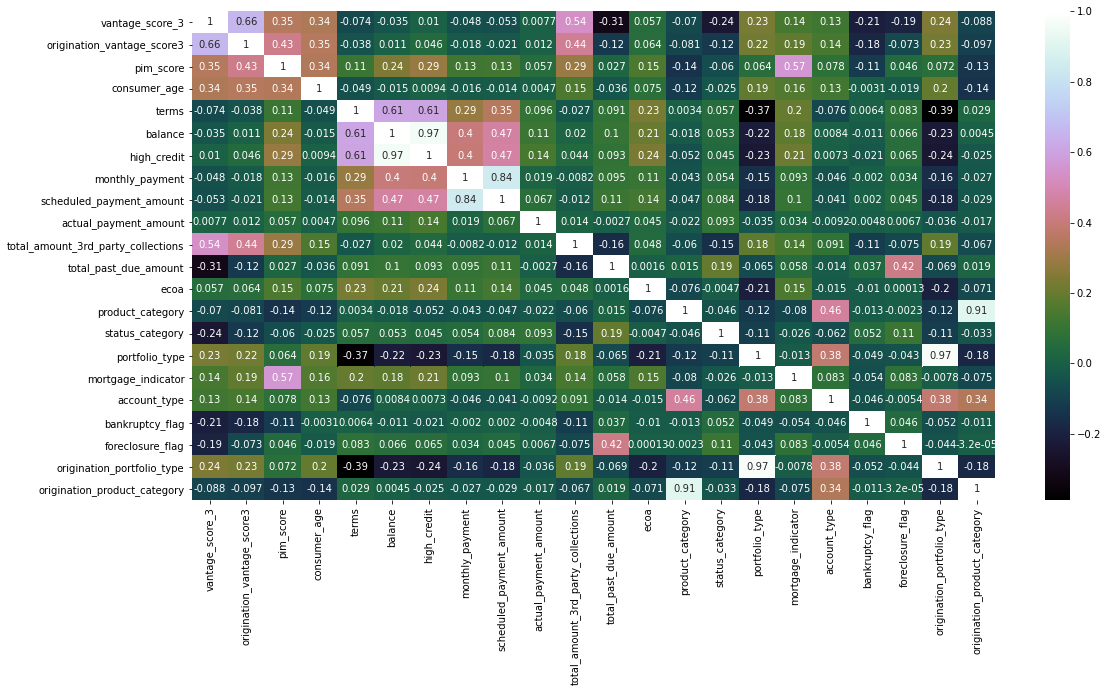

In [185]:
plt.figure(figsize=(18,9))
corr = EC_IMP.iloc[:,:27].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()

#### Also we need to drop columns origination_product_category and origination_portfolio_type as we already have product_category and Portfolio_type which are having more than 0.9 correlation, also we need to drop high_credit which is almost same as balance(0.97 correlation)

In [186]:
EC_IMP=EC_IMP.drop(['origination_portfolio_type','origination_product_category','high_credit'],axis=1)

#### Let us take highly correlated variables(corr>0.80) and create a ratio between them

In [187]:
EC_IMP['pre_pymt']=EC_IMP.scheduled_payment_amount-EC_IMP.monthly_payment

In [188]:
EC_IMP.head(2)

,state,zip_code,vantage_score_3,origination_vantage_score3,pim_score,consumer_age,terms,payment_frequency,balance,monthly_payment,...,UER_SW_042010,UER_SW_052010,UER_SW_062010,UER_SW_072010,UER_SW_082010,UER_SW_092010,UER_SW_102010,UER_SW_112010,UER_SW_122010,pre_pymt
2,MA,2122,645,585.0,16,1,85,D,3250,50,...,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8,0
5,MA,2122,645,585.0,16,1,85,D,3250,50,...,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8,0


In [189]:
EC_IMP.total_amount_3rd_party_collections=EC_IMP.total_amount_3rd_party_collections.replace(9999998,0)

In [190]:
EC_IMP.total_amount_3rd_party_collections.unique()

array([0.000000e+00, 9.999997e+06, 1.930000e+02, ..., 2.605000e+03,
       1.209000e+03, 1.780000e+02])

In [191]:
EC_IMP=EC_IMP.drop(['vantage_score_3','origination_vantage_score3'],axis=1)

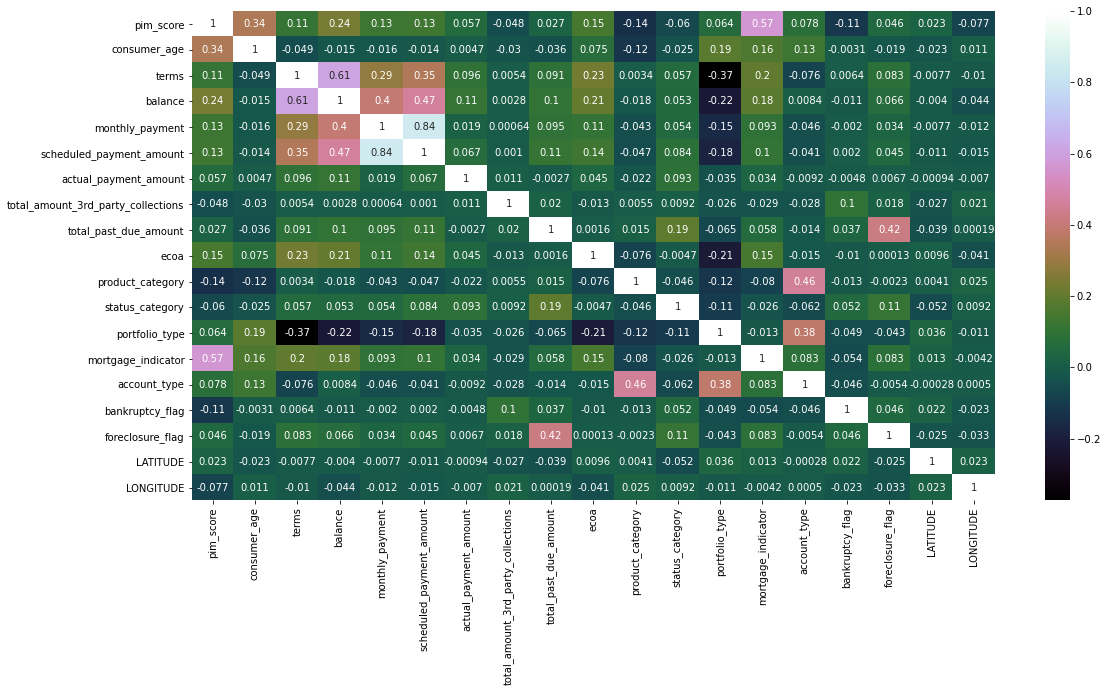

In [192]:
plt.figure(figsize=(18,9))
corr = EC_IMP.iloc[:,:24].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()


#### Plotting no of customers for each region

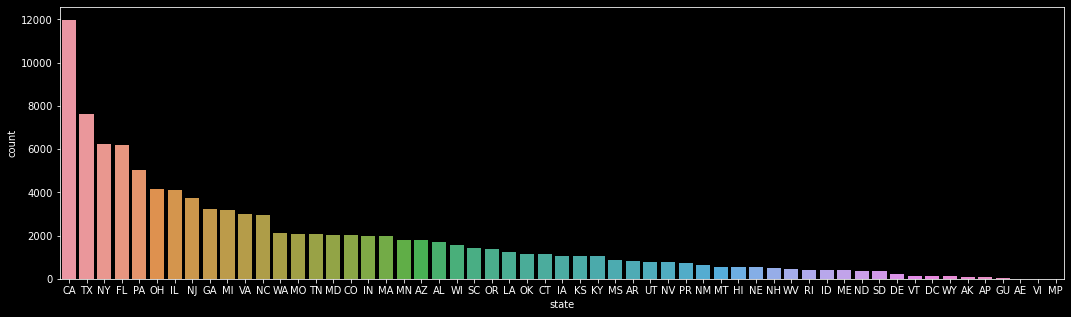

In [193]:
with plt.style.context(('dark_background')):
    plt.figure(figsize=(18,5))
    sns.countplot(x=EC_IMP.state,order=EC_IMP.state.value_counts().index)
    plt.show()

In [194]:
EC_TOP_CUST=EC_IMP.iloc[:,:2].groupby('state',as_index=False).count().sort_values('zip_code',ascending=False).reset_index(drop=True)

In [195]:
EC_TOP_CUST=EC_TOP_CUST.rename(columns={'zip_code':'count'})
EC_TOP_CUST=EC_TOP_CUST.iloc[:10,:]
EC_TOP_CUST

,state,count
0,CA,11976
1,TX,7628
2,NY,6234
3,FL,6213
4,PA,5031
5,OH,4152
6,IL,4115
7,NJ,3761
8,GA,3237
9,MI,3194


#### California, Texas, New York, Florida, Pennsylvania, Ohio, illinois, New Jersey, Georgia, Michigan, Virginia and North Carolina are the leaders in terms of number of customers across US

In [196]:
EC_IMP.bankruptcy_flag=EC_IMP.bankruptcy_flag.astype('int')
EC_IMP.bankruptcy_flag.unique()

array([0, 1])

In [197]:
EC_IMP_BKR_FLG_Y=EC_IMP[EC_IMP.bankruptcy_flag.isin(['1'])].reset_index(drop=True)
EC_IMP_BKR_FLG_N=EC_IMP[EC_IMP.bankruptcy_flag.isin(['0'])].reset_index(drop=True)
BKR_FLG_STATE_N=EC_IMP_BKR_FLG_N.groupby('state',as_index=False).bankruptcy_flag.count().sort_values('bankruptcy_flag',ascending=False).reset_index(drop=True)
BKR_FLG_STATE_Y=EC_IMP_BKR_FLG_Y.groupby('state',as_index=False).bankruptcy_flag.count().sort_values('bankruptcy_flag',ascending=False).reset_index(drop=True)

In [198]:
BKR_FLG_STATE=pd.merge(BKR_FLG_STATE_Y,BKR_FLG_STATE_N,on='state',how='inner')
BKR_FLG_STATE['bkr_y2n_ratio']=BKR_FLG_STATE.bankruptcy_flag_x/BKR_FLG_STATE.bankruptcy_flag_y
BKR_FLG_STATE=BKR_FLG_STATE.rename(columns={'bankruptcy_flag_x':'bkr_y','bankruptcy_flag_y':'bkr_n'})

In [199]:
BKR_FLG_STATE=BKR_FLG_STATE.sort_values('bkr_y2n_ratio',ascending=False).reset_index(drop=True)
BKR_FLG_STATE.head()

,state,bkr_y,bkr_n,bkr_y2n_ratio
0,WY,36,75,0.480000
1,MT,73,491,0.148676
2,ND,42,326,0.128834
3,NV,86,687,0.125182
4,VT,15,120,0.125000


In [200]:
AVG_BKR_REGION=np.mean(BKR_FLG_STATE_Y.bankruptcy_flag)
AVG_BKR_REGION

95.0204081632653

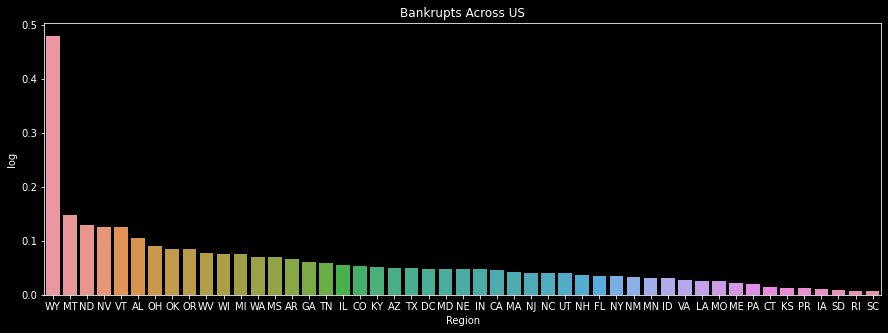

In [201]:
with plt.style.context(('dark_background')):
    plt.figure(figsize=(15,5))
    sns.barplot(y='bkr_y2n_ratio',x='state',data=BKR_FLG_STATE)
    plt.ylabel('Bankrupts')
    plt.xlabel('Region')
    plt.ylabel('log')
    plt.title("Bankrupts Across US")
    plt.show()

In [47]:
us_state=pd.read_excel('./US_STATES.xlsx')
us_state=us_state.rename(columns={'State':'region','Code':'state'})

In [48]:
BKR_RATIO_MEAN=BKR_FLG_STATE.bkr_y2n_ratio.mean()
BKR_RATIO_MEAN

0.06089212359642619

In [49]:
BKR_SAFE_CREDIT=BKR_FLG_STATE[BKR_FLG_STATE.bkr_y2n_ratio<=0.061].sort_values('bkr_y2n_ratio',ascending=False).reset_index(drop=True)
BKR_SAFE_CREDIT=pd.merge(BKR_SAFE_CREDIT,us_state,on='state',how='inner')
BKR_SAFE_CREDIT.head()

,state,bkr_y,bkr_n,bkr_y2n_ratio,region
0,GA,184,3053,0.060269,"Georgia, US"
1,TN,116,1977,0.058675,"Tennessee, US"
2,IL,217,3898,0.055670,"Illinois, US"
3,CO,101,1914,0.052769,"Colorado, US"
4,KY,51,998,0.051102,"Kentucky, US"


In [50]:
BKR_SAFE_PAY=BKR_SAFE_CREDIT[BKR_SAFE_CREDIT.state.isin(EC_TOP_CUST.state)].reset_index(drop=True)
BKR_SAFE_PAY

,state,bkr_y,bkr_n,bkr_y2n_ratio,region
0,GA,184,3053,0.060269,"Georgia, US"
1,IL,217,3898,0.055670,"Illinois, US"
2,TX,356,7272,0.048955,"Texas, US"
3,CA,529,11447,0.046213,"California, US"
4,NJ,149,3612,0.041251,"New Jersey, US"
5,FL,209,6004,0.034810,"Florida, US"
6,NY,208,6026,0.034517,"New York, US"
7,PA,100,4931,0.020280,"Pennsylvania, US"


#### Georgia, Illinois, Texas, California, New Jersey, Florida, New york and Pennsylvania have high number of customers as well as have less a ratio of bankrupt cases

In [51]:
EC_IMP.foreclosure_flag=EC_IMP.foreclosure_flag.astype('int')
EC_IMP=EC_IMP.reset_index(drop=True)

In [52]:
EC_IMP_FCR_FLG_Y=EC_IMP[EC_IMP.foreclosure_flag.isin(['1'])].reset_index(drop=True)
EC_IMP_FCR_FLG_N=EC_IMP[EC_IMP.foreclosure_flag.isin(['0'])].reset_index(drop=True)
FCR_FLG_STATE_N=EC_IMP_FCR_FLG_N.groupby('state',as_index=False).foreclosure_flag.count().sort_values('foreclosure_flag',ascending=False).reset_index(drop=True)
FCR_FLG_STATE_Y=EC_IMP_FCR_FLG_Y.groupby('state',as_index=False).foreclosure_flag.count().sort_values('foreclosure_flag',ascending=False).reset_index(drop=True)

In [53]:

FCR_FLG_STATE=pd.merge(FCR_FLG_STATE_Y,FCR_FLG_STATE_N,on='state',how='inner')
FCR_FLG_STATE['FCR_y2n_ratio']=FCR_FLG_STATE.foreclosure_flag_x/FCR_FLG_STATE.foreclosure_flag_y
FCR_FLG_STATE=FCR_FLG_STATE.rename(columns={'foreclosure_flag_x':'FCR_y','foreclosure_flag_y':'FCR_n'})
FCR_FLG_STATE=FCR_FLG_STATE.sort_values('FCR_y2n_ratio',ascending=False).reset_index(drop=True)
FCR_FLG_STATE.head()

,state,FCR_y,FCR_n,FCR_y2n_ratio
0,DE,10,228,0.043860
1,CO,71,1944,0.036523
2,NV,25,748,0.033422
3,CA,362,11614,0.031169
4,FL,185,6028,0.030690


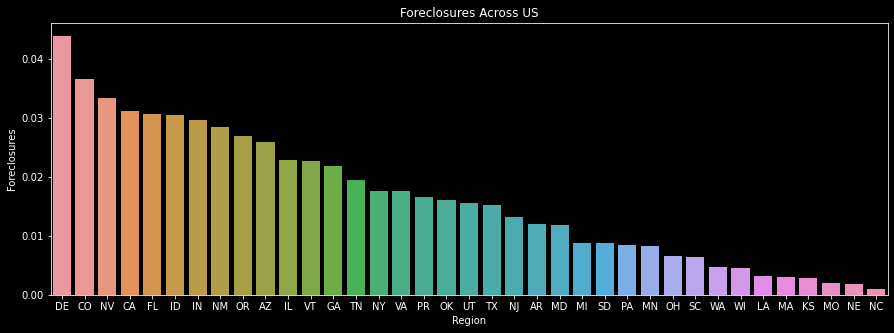

In [54]:
with plt.style.context(('dark_background')):
    plt.figure(figsize=(15,5))
    sns.barplot(y='FCR_y2n_ratio',x='state',data=FCR_FLG_STATE)
    plt.ylabel('Foreclosures')
    plt.xlabel('Region')
    plt.title("Foreclosures Across US")
    plt.show()

In [55]:
FCR_RATIO_MEAN=FCR_FLG_STATE.FCR_y2n_ratio.mean()
FCR_RATIO_MEAN

0.016485915779954032

In [56]:
FCR_SAFE_CREDIT=FCR_FLG_STATE[FCR_FLG_STATE.FCR_y2n_ratio<0.0165].sort_values('FCR_y2n_ratio',ascending=False).reset_index(drop=True)
FCR_SAFE_CREDIT=pd.merge(FCR_SAFE_CREDIT,us_state,on='state',how='inner')
FCR_SAFE_CREDIT.head(10)

,state,FCR_y,FCR_n,FCR_y2n_ratio,region
0,OK,18,1124,0.016014,"Oklahoma, US"
1,UT,12,772,0.015544,"Utah, US"
2,TX,114,7514,0.015172,"Texas, US"
3,NJ,49,3712,0.013200,"New Jersey, US"
4,AR,10,828,0.012077,"Arkansas, US"
5,MD,24,2022,0.011869,"Maryland, US"
6,MI,28,3166,0.008844,"Michigan, US"
7,SD,3,344,0.008721,"South Dakota, US"
8,PA,42,4989,0.008419,"Pennsylvania, US"
9,MN,15,1799,0.008338,"Minnesota, US"


In [57]:
FCR_SAFE_PAY=FCR_SAFE_CREDIT[FCR_SAFE_CREDIT.state.isin(EC_TOP_CUST.state)].reset_index(drop=True)
FCR_SAFE_PAY

,state,FCR_y,FCR_n,FCR_y2n_ratio,region
0,TX,114,7514,0.015172,"Texas, US"
1,NJ,49,3712,0.013200,"New Jersey, US"
2,MI,28,3166,0.008844,"Michigan, US"
3,PA,42,4989,0.008419,"Pennsylvania, US"
4,OH,27,4125,0.006545,"Ohio, US"


#### Texas, New Jersey, Michigan, Pennsylvania and Ohio have more no of customers as well as less percentage of foreclosures which is good

In [58]:
SAFE_PAY_US=pd.merge(FCR_SAFE_PAY,BKR_SAFE_PAY,on='state',how='inner')
SAFE_PAY_US

,state,FCR_y,FCR_n,FCR_y2n_ratio,region_x,bkr_y,bkr_n,bkr_y2n_ratio,region_y
0,TX,114,7514,0.015172,"Texas, US",356,7272,0.048955,"Texas, US"
1,NJ,49,3712,0.013200,"New Jersey, US",149,3612,0.041251,"New Jersey, US"
2,PA,42,4989,0.008419,"Pennsylvania, US",100,4931,0.020280,"Pennsylvania, US"


#### From the above we can understand that Texas, New Jersey and Pennsylvania are the regions where there are lesser defaulters and less rate of foreclosures and payers

In [59]:
EC_FNL_ANY=EC_IMP.drop(['LATITUDE',
                          'LONGITUDE',
                          'UER_0110_PER',
                          'UER_0210_PER',
                          'UER_0310_PER',
                          'UER_0410_PER',
                          'UER_0510_PER',
                          'UER_0610_PER',
                          'UER_0710_PER',
                          'UER_0810_PER',
                          'UER_0910_PER',
                          'UER_1010_PER',
                          'UER_1110_PER',
                          'UER_1210_PER',
                          'UER_SW_012010',
                          'UER_SW_022010',
                          'UER_SW_032010',
                          'UER_SW_042010',
                          'UER_SW_052010',
                          'UER_SW_062010',
                          'UER_SW_072010',
                          'UER_SW_082010',
                          'UER_SW_092010',
                          'UER_SW_102010',
                          'UER_SW_112010',
                          'UER_SW_122010',
                            'zip_code',
                            'COUNTY'],axis=1)

In [60]:
EC_FNL_ANY.dtypes

state                                  object
pim_score                               int64
consumer_age                            int64
terms                                   int64
payment_frequency                      object
balance                                 int64
monthly_payment                         int64
scheduled_payment_amount                int64
actual_payment_amount                 float64
total_amount_3rd_party_collections    float64
total_past_due_amount                 float64
ecoa                                    int32
product_category                        int32
status_category                         int64
portfolio_type                          int32
mortgage_indicator                      int64
account_type                            int32
rate_status                            object
bankruptcy_flag                         int32
foreclosure_flag                        int32
CITY                                   object
hpi_09                            

In [61]:
EC_FNL_ANY.payment_frequency=EC_FNL_ANY.payment_frequency.astype('str')
EC_FNL_ANY.iloc[:, 5] = labelencoder_EC_IMP.fit_transform(EC_FNL_ANY.iloc[:, 5])

In [62]:
sum(EC_FNL_ANY.pim_score==0)

58

In [63]:
len(EC_FNL_ANY.columns)

28

In [64]:
EC_FNL_ANY=EC_FNL_ANY.loc[~EC_FNL_ANY.pim_score.isin(EC_FNL_ANY.pim_score==0)]

In [65]:
lost_percent=((len(EC.index)-len(EC_FNL_ANY.index))/len(EC.index))*100
lost_percent

4.457502152026647

In [66]:
EC_FNL_ANY.head()

,state,pim_score,consumer_age,terms,payment_frequency,balance,monthly_payment,scheduled_payment_amount,actual_payment_amount,total_amount_3rd_party_collections,...,bankruptcy_flag,foreclosure_flag,CITY,hpi_09,hpi_10,hpi_11,GDP_2009,GDP_2010,GDP_2011,pre_pymt
0,MA,16,1,85,D,3223,50,50,0.0,0.0,...,0,0,Dorchester,354.85,357.67,357.74,59178,60808,61769,0
1,MA,16,1,85,D,3223,50,50,0.0,0.0,...,0,0,Dorchester,354.85,357.67,357.74,59178,60808,61769,0
2,MA,16,1,85,D,4146,52,52,0.0,0.0,...,0,0,Dorchester,354.85,357.67,357.74,59178,60808,61769,0
3,NY,22,1,0,0,0,0,0,0.0,0.0,...,0,0,Fairport,310.02,305.88,305.54,59481,61267,61185,0
4,NY,22,1,0,0,0,0,0,0.0,0.0,...,0,0,Fairport,310.02,305.88,305.54,59481,61267,61185,0


In [67]:
EC_FNL_ANY=EC_FNL_ANY.drop_duplicates().reset_index(drop=True)

In [68]:
len(EC_FNL_ANY.index)

78224

In [69]:
EC_FNL=pd.merge(EC_FNL_ANY,us_state,on='state',how='inner')

EC_FNL

,state,pim_score,consumer_age,terms,payment_frequency,balance,monthly_payment,scheduled_payment_amount,actual_payment_amount,total_amount_3rd_party_collections,...,foreclosure_flag,CITY,hpi_09,hpi_10,hpi_11,GDP_2009,GDP_2010,GDP_2011,pre_pymt,region
0,MA,16,1,85,D,3223,50,50,0.0,0.0,...,0,Dorchester,354.85,357.67,357.74,59178,60808,61769,0,"Massachusetts, US"
1,MA,16,1,85,D,4146,52,52,0.0,0.0,...,0,Dorchester,354.85,357.67,357.74,59178,60808,61769,0,"Massachusetts, US"
2,MA,39,6,0,0,0,0,0,0.0,0.0,...,0,Fall River,254.89,249.61,237.86,59178,60808,61769,0,"Massachusetts, US"
3,MA,39,6,0,0,0,0,0,25.0,0.0,...,0,Fall River,254.89,249.61,237.86,59178,60808,61769,0,"Massachusetts, US"
4,MA,39,6,0,0,0,0,0,0.0,0.0,...,0,Fall River,254.89,249.61,237.86,59178,60808,61769,0,"Massachusetts, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77607,DC,40,3,360,M,18291,994,994,0.0,0.0,...,0,Washington,673.60,683.17,669.43,166178,168030,166870,0,"District of Columbia, US"
77608,DC,40,3,120,0,1116,143,143,0.0,0.0,...,0,Washington,673.60,683.17,669.43,166178,168030,166870,0,"District of Columbia, US"
77609,DC,40,3,360,M,11240,109,109,217.0,0.0,...,0,Washington,673.60,683.17,669.43,166178,168030,166870,0,"District of Columbia, US"
77610,DC,40,3,360,M,18272,1008,1008,2941.0,0.0,...,0,Washington,673.60,683.17,669.43,166178,168030,166870,0,"District of Columbia, US"


In [70]:
EC_FNL.region=EC_FNL.region.apply(lambda x : x[:-4])

In [71]:
len(EC_FNL.region.unique())

53

In [72]:
EC_FNL=EC_FNL.drop(columns=['CITY',
                            'hpi_09',
                            'hpi_10',
                            'hpi_11',
                            'GDP_2009',
                            'GDP_2010',
                            'GDP_2011'])

In [73]:
list(EC_FNL.columns)

['state',
 'pim_score',
 'consumer_age',
 'terms',
 'payment_frequency',
 'balance',
 'monthly_payment',
 'scheduled_payment_amount',
 'actual_payment_amount',
 'total_amount_3rd_party_collections',
 'total_past_due_amount',
 'ecoa',
 'product_category',
 'status_category',
 'portfolio_type',
 'mortgage_indicator',
 'account_type',
 'rate_status',
 'bankruptcy_flag',
 'foreclosure_flag',
 'pre_pymt',
 'region']

In [74]:
#EC_FNL.to_excel('EQ_FNL.xlsx')

In [75]:
len(FCR_FLG_STATE)

37

In [76]:
len(BKR_FLG_STATE)

49

In [77]:
FCR_FLG_STATE.head()

,state,FCR_y,FCR_n,FCR_y2n_ratio
0,DE,10,228,0.043860
1,CO,71,1944,0.036523
2,NV,25,748,0.033422
3,CA,362,11614,0.031169
4,FL,185,6028,0.030690


In [78]:
BKR_FLG_STATE.head()

,state,bkr_y,bkr_n,bkr_y2n_ratio
0,WY,36,75,0.480000
1,MT,73,491,0.148676
2,ND,42,326,0.128834
3,NV,86,687,0.125182
4,VT,15,120,0.125000


In [79]:
EC_FNL['loss_amount']=EC_FNL.actual_payment_amount-EC_FNL.scheduled_payment_amount

In [80]:
EC_FNL.head()

,state,pim_score,consumer_age,terms,payment_frequency,balance,monthly_payment,scheduled_payment_amount,actual_payment_amount,total_amount_3rd_party_collections,...,status_category,portfolio_type,mortgage_indicator,account_type,rate_status,bankruptcy_flag,foreclosure_flag,pre_pymt,region,loss_amount
0,MA,16,1,85,D,3223,50,50,0.0,0.0,...,1,1,0,6,1,0,0,0,Massachusetts,-50.0
1,MA,16,1,85,D,4146,52,52,0.0,0.0,...,1,1,0,6,1,0,0,0,Massachusetts,-52.0
2,MA,39,6,0,0,0,0,0,0.0,0.0,...,1,4,0,10,1,0,0,0,Massachusetts,0.0
3,MA,39,6,0,0,0,0,0,25.0,0.0,...,1,4,0,32,1,0,0,0,Massachusetts,25.0
4,MA,39,6,0,0,0,0,0,0.0,0.0,...,1,4,0,32,1,0,0,0,Massachusetts,0.0


In [81]:
RSK_FLG_STATE=pd.merge(BKR_FLG_STATE,FCR_FLG_STATE,on='state',how='outer')

In [82]:
RSK_FLG_STATE=RSK_FLG_STATE.drop(columns=['bkr_y','bkr_n','FCR_y','FCR_n'])

In [83]:
RSK_FLG_STATE.FCR_y2n_ratio=RSK_FLG_STATE.FCR_y2n_ratio.fillna(0)
RSK_FLG_STATE.bkr_y2n_ratio=RSK_FLG_STATE.bkr_y2n_ratio.fillna(0)

In [84]:
RSK_FLG_STATE['rsk_ratio']=RSK_FLG_STATE.bkr_y2n_ratio+RSK_FLG_STATE.FCR_y2n_ratio

In [85]:
RSK_FLG_STATE=RSK_FLG_STATE.sort_values('rsk_ratio',ascending=False).reset_index(drop=True)

In [86]:
len(RSK_FLG_STATE)

50

In [91]:
def get_truncated_normal(mean=30, sd=3, low=22, upp=38):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [92]:
# def get_truncated_normal1(mean,sd,low,upp):
#     return(truncnorm((low-mean)/sd,(upp-mean)/sd,loc=mean,scale=sd))

In [93]:
# norm1=get_truncated_normal1(30,3,22,38)

In [94]:
# norm1

In [95]:
# l1=list(norm1.rvs(51))
# l1

In [96]:
norm=get_truncated_normal(mean=30, sd=3, low=22, upp=38)

In [97]:

# l1=list(norm.rvs(50))
# l1

In [98]:
val_dti_dist=pd.DataFrame(list(norm.rvs(50)))
val_dti_dist

,0
0,27.131326
1,33.858656
2,31.349904
3,29.760518
4,32.381472
5,29.321797
6,27.932902
7,28.506968
8,29.544034
9,30.576291


In [99]:
val_dti_dist.columns=val_dti_dist.columns.astype('str')

In [100]:
val_dti_dist=val_dti_dist.rename(columns={'0':'dti'})

In [101]:
val_dti_dist=val_dti_dist.sort_values('dti',ascending=True).reset_index(drop=True)

In [102]:
val_dti_dist.iloc[:3]

,dti
0,23.248492
1,25.003449
2,25.964097


In [103]:
val_dti_dist.iloc[-3:]

,dti
47,33.858656
48,33.982664
49,35.093733


In [104]:
RSK_state=pd.concat([RSK_FLG_STATE,val_dti_dist],axis=1)

In [105]:
RSK_state=RSK_state.drop(columns=['bkr_y2n_ratio','FCR_y2n_ratio'])

In [106]:
h=list(RSK_state.dti)
std = np.std(h) 
mean = np.mean(h)

Text(0, 0.5, 'DTI')

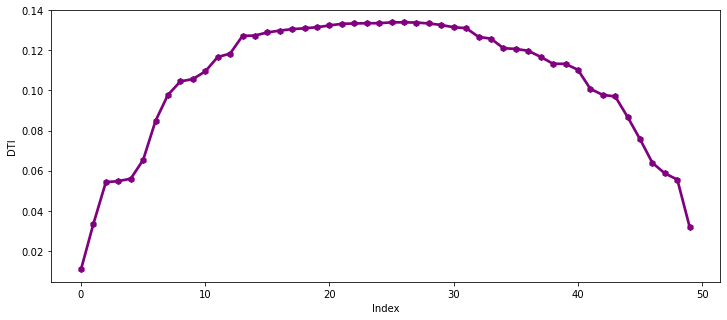

In [107]:
plt.figure(figsize=(12,5))
plt.plot(norm.pdf(h),ls='-',lw=2.7,marker='h',color='purple')
plt.xlabel('Index')
plt.ylabel('DTI')
#plt.yscale('symlog')

In [108]:
RSK_state.head()

,state,rsk_ratio,dti
0,WY,0.480000,23.248492
1,NV,0.158604,25.003449
2,MT,0.148676,25.964097
3,VT,0.147727,25.985533
4,ND,0.128834,26.034439


In [109]:
EC_FNL_ANY=pd.merge(EC_FNL,RSK_state,on='state',how='inner')

In [110]:
EC_FNL_ANY['Amount_Pred']=EC_FNL_ANY.pim_score*EC_FNL_ANY.dti/100

In [111]:
EC_FNL_ANY.head()

,state,pim_score,consumer_age,terms,payment_frequency,balance,monthly_payment,scheduled_payment_amount,actual_payment_amount,total_amount_3rd_party_collections,...,account_type,rate_status,bankruptcy_flag,foreclosure_flag,pre_pymt,region,loss_amount,rsk_ratio,dti,Amount_Pred
0,MA,16,1,85,D,3223,50,50,0.0,0.0,...,6,1,0,0,0,Massachusetts,-50.0,0.044667,31.062886,4.970062
1,MA,16,1,85,D,4146,52,52,0.0,0.0,...,6,1,0,0,0,Massachusetts,-52.0,0.044667,31.062886,4.970062
2,MA,39,6,0,0,0,0,0,0.0,0.0,...,10,1,0,0,0,Massachusetts,0.0,0.044667,31.062886,12.114525
3,MA,39,6,0,0,0,0,0,25.0,0.0,...,32,1,0,0,0,Massachusetts,25.0,0.044667,31.062886,12.114525
4,MA,39,6,0,0,0,0,0,0.0,0.0,...,32,1,0,0,0,Massachusetts,0.0,0.044667,31.062886,12.114525


In [112]:
#EC_FNL_ANY.to_excel('EQ_REG_DAT.xlsx')

In [113]:
EC_FNL_ANY['Amount_reg_pred_min']=((EC_FNL_ANY.pim_score*0.29683)+0.201841)*95/100
EC_FNL_ANY['Amount_reg_pred_max']=((EC_FNL_ANY.pim_score*0.29683)+0.201841)*105/100

In [114]:
EC_FNL_ANY.head()

,state,pim_score,consumer_age,terms,payment_frequency,balance,monthly_payment,scheduled_payment_amount,actual_payment_amount,total_amount_3rd_party_collections,...,bankruptcy_flag,foreclosure_flag,pre_pymt,region,loss_amount,rsk_ratio,dti,Amount_Pred,Amount_reg_pred_min,Amount_reg_pred_max
0,MA,16,1,85,D,3223,50,50,0.0,0.0,...,0,0,0,Massachusetts,-50.0,0.044667,31.062886,4.970062,4.703565,5.198677
1,MA,16,1,85,D,4146,52,52,0.0,0.0,...,0,0,0,Massachusetts,-52.0,0.044667,31.062886,4.970062,4.703565,5.198677
2,MA,39,6,0,0,0,0,0,0.0,0.0,...,0,0,0,Massachusetts,0.0,0.044667,31.062886,12.114525,11.189300,12.367122
3,MA,39,6,0,0,0,0,0,25.0,0.0,...,0,0,0,Massachusetts,25.0,0.044667,31.062886,12.114525,11.189300,12.367122
4,MA,39,6,0,0,0,0,0,0.0,0.0,...,0,0,0,Massachusetts,0.0,0.044667,31.062886,12.114525,11.189300,12.367122


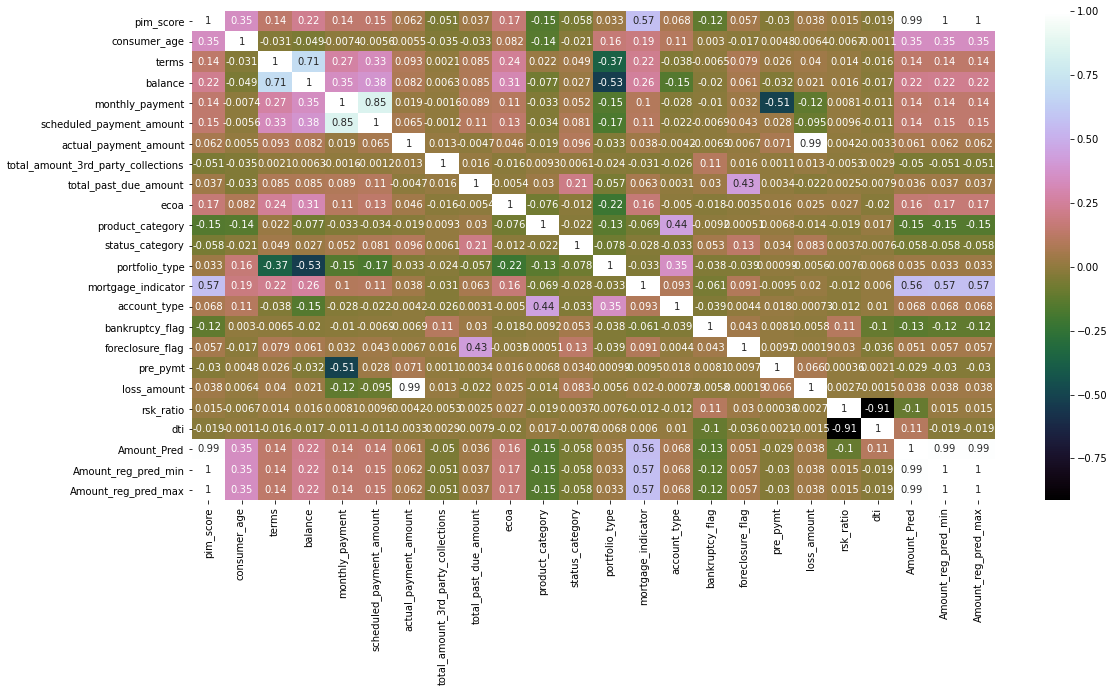

In [115]:
plt.figure(figsize=(18,9))
corr = EC_FNL_ANY.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()

In [116]:
EC_FNL_ANY.bankruptcy_flag=EC_FNL_ANY.bankruptcy_flag.apply(lambda x : x*2)

In [117]:
EC_FNL_ANY.foreclosure_flag=EC_FNL_ANY.foreclosure_flag.astype('int')
EC_FNL_ANY.bankruptcy_flag=EC_FNL_ANY.bankruptcy_flag.astype('int')

In [118]:

EC_FNL_ANY.bankruptcy_flag.unique()

array([0, 2])

In [119]:
EC_FNL_ANY['risk_parameter']=EC_FNL_ANY.bankruptcy_flag+EC_FNL_ANY.foreclosure_flag

In [120]:
EC_FNL_ANY_TEST=EC_FNL_ANY[['risk_parameter','pim_score','balance']]

In [121]:
EC_FNL_ANY_TEST.head()

,risk_parameter,pim_score,balance
0,0,16,3223
1,0,16,4146
2,0,39,0
3,0,39,0
4,0,39,0


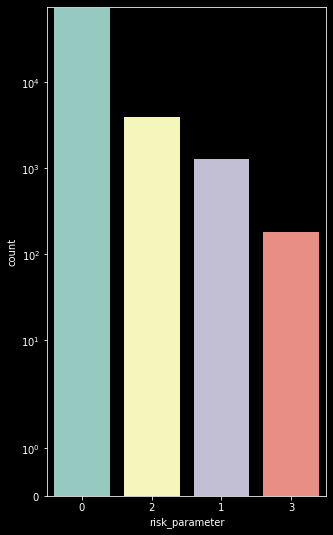

In [122]:
with plt.style.context(('dark_background')):
    plt.figure(figsize=(5,9))
    sns.countplot(x=EC_FNL_ANY.risk_parameter,order=EC_FNL_ANY.risk_parameter.value_counts().index)
    plt.yscale('symlog')
    plt.show()

In [123]:
EC_FNL_ANY.head()

,state,pim_score,consumer_age,terms,payment_frequency,balance,monthly_payment,scheduled_payment_amount,actual_payment_amount,total_amount_3rd_party_collections,...,foreclosure_flag,pre_pymt,region,loss_amount,rsk_ratio,dti,Amount_Pred,Amount_reg_pred_min,Amount_reg_pred_max,risk_parameter
0,MA,16,1,85,D,3223,50,50,0.0,0.0,...,0,0,Massachusetts,-50.0,0.044667,31.062886,4.970062,4.703565,5.198677,0
1,MA,16,1,85,D,4146,52,52,0.0,0.0,...,0,0,Massachusetts,-52.0,0.044667,31.062886,4.970062,4.703565,5.198677,0
2,MA,39,6,0,0,0,0,0,0.0,0.0,...,0,0,Massachusetts,0.0,0.044667,31.062886,12.114525,11.189300,12.367122,0
3,MA,39,6,0,0,0,0,0,25.0,0.0,...,0,0,Massachusetts,25.0,0.044667,31.062886,12.114525,11.189300,12.367122,0
4,MA,39,6,0,0,0,0,0,0.0,0.0,...,0,0,Massachusetts,0.0,0.044667,31.062886,12.114525,11.189300,12.367122,0


In [124]:
list(EC_FNL_ANY.columns)

['state',
 'pim_score',
 'consumer_age',
 'terms',
 'payment_frequency',
 'balance',
 'monthly_payment',
 'scheduled_payment_amount',
 'actual_payment_amount',
 'total_amount_3rd_party_collections',
 'total_past_due_amount',
 'ecoa',
 'product_category',
 'status_category',
 'portfolio_type',
 'mortgage_indicator',
 'account_type',
 'rate_status',
 'bankruptcy_flag',
 'foreclosure_flag',
 'pre_pymt',
 'region',
 'loss_amount',
 'rsk_ratio',
 'dti',
 'Amount_Pred',
 'Amount_reg_pred_min',
 'Amount_reg_pred_max',
 'risk_parameter']

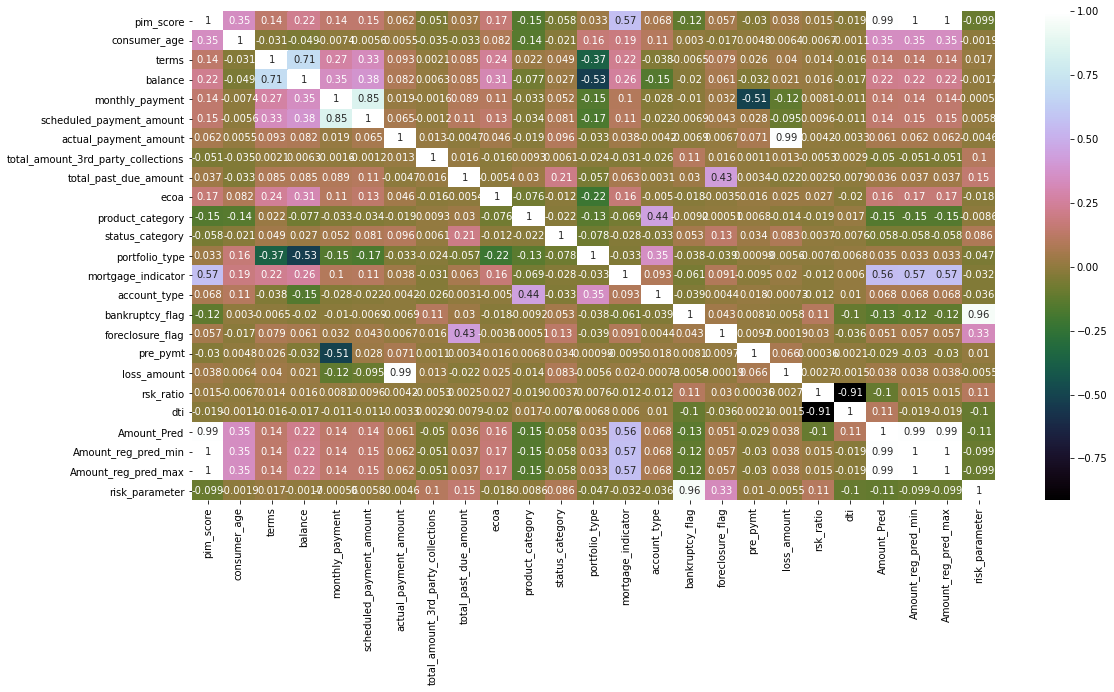

In [125]:
plt.figure(figsize=(18,9))
corr = EC_FNL_ANY.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()

In [126]:
#EC_FNL_ANY=EC_FNL_ANY.drop(['state','Amount_reg_pred_min','Amount_reg_pred_max',
 #                           'Amount_Pred','actual_payment_amount','dti','scheduled_payment_amount'],axis=1)
EC_FNL_ANY=EC_FNL_ANY.drop(['bankruptcy_flag','foreclosure_flag'],axis=1)

In [127]:
#EC_FNL_ANY.to_excel('EQ_FN_ANY.xlsx')

In [128]:
EC_FNL_ANY.rate_status=EC_FNL_ANY.rate_status.astype('int')

In [129]:
from sklearn import preprocessing
# encode categorical variables using Label Encoder
# select all categorical variables
df_categorical = EC_FNL_ANY.select_dtypes(include=['object'])
df_categorical.head()

,state,payment_frequency,region
0,MA,D,Massachusetts
1,MA,D,Massachusetts
2,MA,0,Massachusetts
3,MA,0,Massachusetts
4,MA,0,Massachusetts


In [130]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,state,payment_frequency,region
0,17,2,19
1,17,2,19
2,17,0,19
3,17,0,19
4,17,0,19


In [131]:
EC_FNL_ANY = EC_FNL_ANY.drop(df_categorical.columns, axis=1)
EC_FNL_ANY = pd.concat([EC_FNL_ANY, df_categorical], axis=1)
EC_FNL_ANY.head()

,pim_score,consumer_age,terms,balance,monthly_payment,scheduled_payment_amount,actual_payment_amount,total_amount_3rd_party_collections,total_past_due_amount,ecoa,...,loss_amount,rsk_ratio,dti,Amount_Pred,Amount_reg_pred_min,Amount_reg_pred_max,risk_parameter,state,payment_frequency,region
0,16,1,85,3223,50,50,0.0,0.0,0.0,2,...,-50.0,0.044667,31.062886,4.970062,4.703565,5.198677,0,17,2,19
1,16,1,85,4146,52,52,0.0,0.0,0.0,2,...,-52.0,0.044667,31.062886,4.970062,4.703565,5.198677,0,17,2,19
2,39,6,0,0,0,0,0.0,0.0,0.0,2,...,0.0,0.044667,31.062886,12.114525,11.189300,12.367122,0,17,0,19
3,39,6,0,0,0,0,25.0,0.0,0.0,2,...,25.0,0.044667,31.062886,12.114525,11.189300,12.367122,0,17,0,19
4,39,6,0,0,0,0,0.0,0.0,0.0,2,...,0.0,0.044667,31.062886,12.114525,11.189300,12.367122,0,17,0,19


In [132]:
EC_FNL_ANY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77081 entries, 0 to 77080
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   pim_score                           77081 non-null  int64  
 1   consumer_age                        77081 non-null  int64  
 2   terms                               77081 non-null  int64  
 3   balance                             77081 non-null  int64  
 4   monthly_payment                     77081 non-null  int64  
 5   scheduled_payment_amount            77081 non-null  int64  
 6   actual_payment_amount               77081 non-null  float64
 7   total_amount_3rd_party_collections  77081 non-null  float64
 8   total_past_due_amount               77081 non-null  float64
 9   ecoa                                77081 non-null  int32  
 10  product_category                    77081 non-null  int32  
 11  status_category                     77081

In [133]:
#EC_FNL_ANY.to_csv('EQ_FN_ANY.csv')

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
# Putting feature variable to X
X = EC_FNL_ANY.drop('risk_parameter',axis=1)

# Putting response variable to y
y = EC_FNL_ANY['risk_parameter']

In [136]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state = 75)
X_train.head()

,pim_score,consumer_age,terms,balance,monthly_payment,scheduled_payment_amount,actual_payment_amount,total_amount_3rd_party_collections,total_past_due_amount,ecoa,...,pre_pymt,loss_amount,rsk_ratio,dti,Amount_Pred,Amount_reg_pred_min,Amount_reg_pred_max,state,payment_frequency,region
75869,33,4,180,16135,739,739,738.0,0.0,21.0,2,...,0,-1.0,0.076923,29.321797,9.676193,9.497369,10.497093,47,5,46
52061,37,6,60,328,0,0,329.0,0.0,0.0,3,...,0,329.0,0.077382,29.251119,10.822914,10.625323,11.743779,3,0,3
61431,63,3,0,8421,418,418,525.0,0.0,0.0,3,...,0,107.0,0.011385,33.982664,21.409078,17.957024,19.847238,10,5,13
4273,54,3,240,14599,308,308,0.0,0.0,0.0,5,...,0,-308.0,0.052147,30.419451,16.426503,15.419128,17.042194,32,1,30
20793,33,4,0,909,29,29,35.0,0.0,32809.0,2,...,0,6.0,0.096595,27.884862,9.202004,9.497369,10.497093,33,5,33


In [137]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [138]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17959
           1       0.65      0.33      0.44       308
           2       1.00      0.01      0.02       955
           3       1.00      0.02      0.04        49

    accuracy                           0.94     19271
   macro avg       0.90      0.34      0.36     19271
weighted avg       0.94      0.94      0.91     19271



In [139]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[17921    38     0     0]
 [  207   101     0     0]
 [  936    11     8     0]
 [   42     6     0     1]]
0.9356546105547195


In [145]:
# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
#import pydot, graphviz

# Putting features
features = list(EC_FNL_ANY.columns[1:])
features

['consumer_age',
 'terms',
 'balance',
 'monthly_payment',
 'scheduled_payment_amount',
 'actual_payment_amount',
 'total_amount_3rd_party_collections',
 'total_past_due_amount',
 'ecoa',
 'product_category',
 'status_category',
 'portfolio_type',
 'mortgage_indicator',
 'account_type',
 'rate_status',
 'pre_pymt',
 'loss_amount',
 'rsk_ratio',
 'dti',
 'Amount_Pred',
 'Amount_reg_pred_min',
 'Amount_reg_pred_max',
 'risk_parameter',
 'state',
 'payment_frequency',
 'region']

In [141]:
import pydotplus
os.environ["PATH"] +=os.pathsep + 'C:\\Users\\adity\\Anaconda3\\Library\\bin\\graphviz'
import sklearn.tree as tree

In [142]:
clf=tree.DecisionTreeClassifier(max_depth=4,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9342016501478906

In [143]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,
                         class_names=["0","1","2","3"],      
                         filled=True, rounded=True,
                         special_characters=True,proportion=True)

### graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

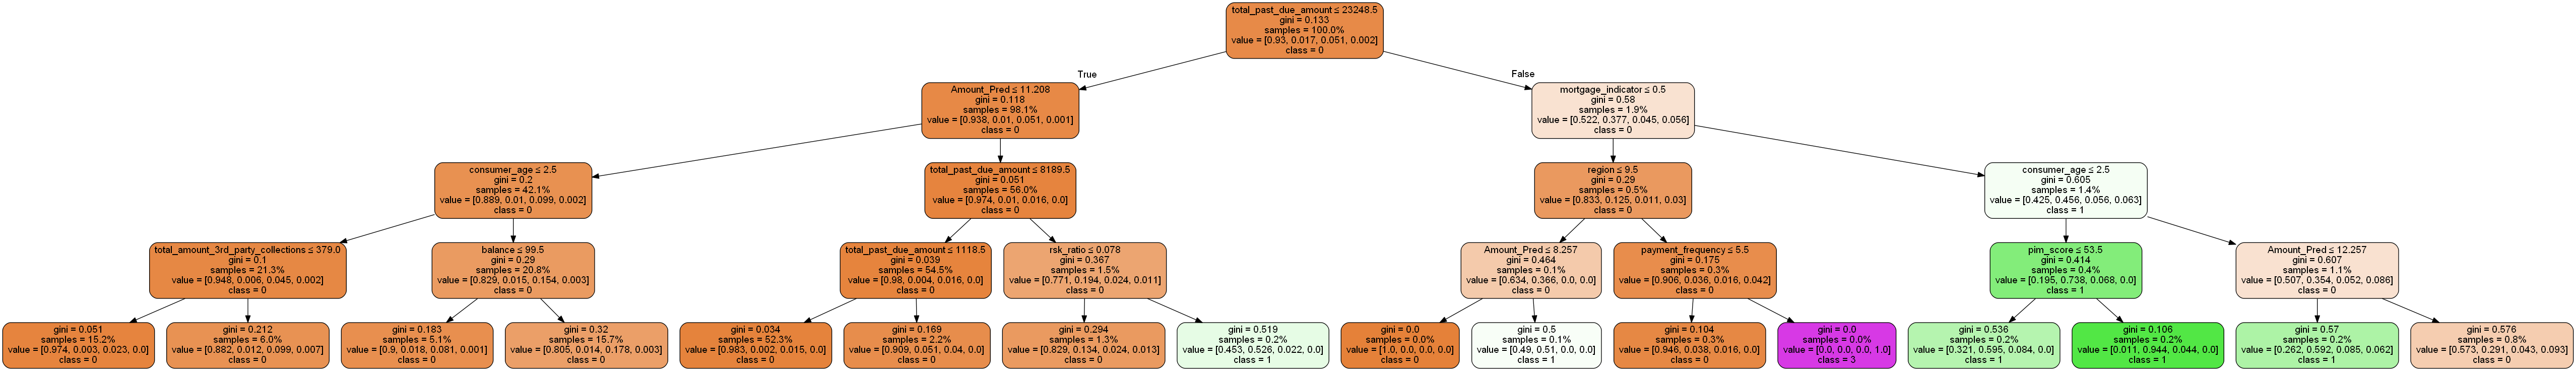

In [144]:
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())